In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
left=df[df.left==0]  #left the company
left.shape

(11428, 10)

In [7]:
retained=df[df.left==1] #havent left the company
retained.shape

(3571, 10)

In [8]:
df.groupby("left").mean()

C:\Users\abcd\AppData\Local\Temp\ipykernel_2336\189522867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

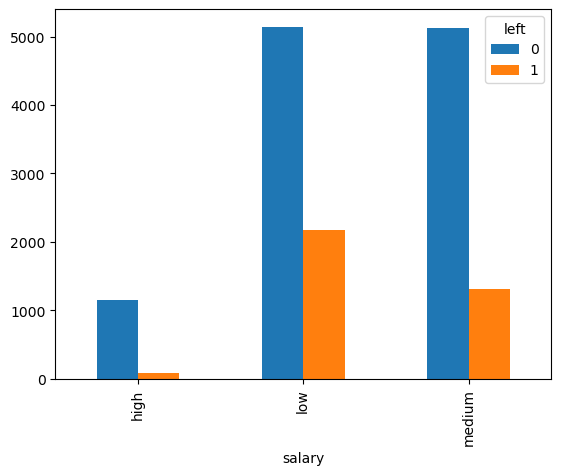

In [12]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

<Axes: xlabel='Department'>

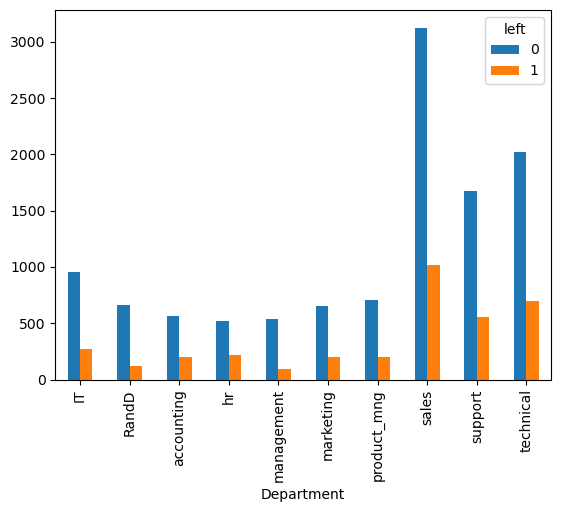

In [13]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [ ]:
#now we have rerealized that department isnt as useful for the retention rate.
#usful factors are'satisfaction_level','average_montly_hours','promotion_last_5years','salary'

In [15]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
#as salary is in word format and isnt numerical we should make it numerical.

In [19]:
dummiesdf=pd.get_dummies(subdf.salary,prefix="salary")
newsubdf=pd.concat([subdf,dummiesdf],axis="columns")
newsubdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [23]:
newsubdf.drop('salary',axis="columns",inplace=True)  #put inplace or it wont remove salary column
newsubdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X=newsubdf

In [27]:
y=df.left

In [28]:
reg=LogisticRegression()

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [43]:
reg.fit(X_train,y_train)

LogisticRegression()

In [44]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
reg.score(X_test,y_test)

0.76